In [43]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats

In [44]:
%matplotlib inline

In [45]:
#read in the cleaned data from csv file
df = pd.read_csv('airbnbdfClean_fin.csv', encoding = 'unicode_escape')
df.sample(5)

,city,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
102,LaRochelle,RÄÂ©sidence BNB Swimming Pool - Awesome view,Entire home,110,RÄÂ©sidence BNB,105,4.55,"['4 guests', '1 bedroom', '3 beds', '1 bath', ...","[""['4 guests'"", "" '1 bedroom'"", "" '3 beds'"", ""...",4,'1 bedroom','3 beds','1 bath',1.0,3,1.0
280,Paris,SPACIOUS FLAT 6/8P NEAR GRANDS BOULEVARDS,Entire home,309,Fabienne,11,4.18,"['8 guests', '4 bedrooms', '4 beds', '2.5 bath...","[""['8 guests'"", "" '4 bedrooms'"", "" '4 beds'"", ...",8,'4 bedrooms','4 beds','2.5 baths',4.0,4,2.5
317,Paris,VIEW EIFFEL TOWER / 1MN BY WALK TO EIFFEL TOWER,Entire home,140,Andrea,44,4.27,"['4 guests', '1 bedroom', '2 beds', '1 bath', ...","[""['4 guests'"", "" '1 bedroom'"", "" '2 beds'"", ""...",4,'1 bedroom','2 beds','1 bath',1.0,2,1.0
123,LaRochelle,ABRI COTIER DE CHARME ENTRE MER ET FORET,Entire home,250,Christophe,7,5.00,"['4 guests', '2 bedrooms', '2 beds', '1 bath',...","[""['4 guests'"", "" '2 bedrooms'"", "" '2 beds'"", ...",4,'2 bedrooms','2 beds','1 bath',2.0,2,1.0
217,LaRochelle,Cottage tout confort 4 personnes,Entire home,148,Le Bois,34,4.31,"['4 guests', '2 bedrooms', '3 beds', '1 bath',...","[""['4 guests'"", "" '2 bedrooms'"", "" '3 beds'"", ...",4,'2 bedrooms','3 beds','1 bath',2.0,3,1.0


In [46]:
airdf = df[['city','house_title','house_type','price','user','no_of_ratings','rating','no_of_guest','house_size','no_of_beds','no_of_baths','house','beds','bath']]
airdf.sample(5)

,city,house_title,house_type,price,user,no_of_ratings,rating,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
139,LaRochelle,La cabane au fond du jardin,Private room in guesthouse,45,StÄÂ©phanie,5,5.00,2,'1 bedroom','1 bed','1 shared bath',1.0,1,1.0
410,Paris,Steps from Notre-Dame,Entire home,335,Catherine,14,5.00,6,'2 bedrooms','3 beds','1 bath',2.0,3,1.0
237,LaRochelle,Chambre C dans grand appartement,Private room in apartment,24,Alain,20,4.85,2,'1 bedroom','2 beds','1 shared bath',1.0,2,1.0
449,Paris,King of Saint-Lazare - XXI,Entire home,226,Ari,10,4.90,6,'2 bedrooms','3 beds','2 baths',2.0,3,2.0
297,Paris,Sublime chambre avec merveilleuse vue panoramique,Room in boutique hotel,326,Julia,22,4.95,2,'1 bedroom','1 bed','1 bath',1.0,1,1.0


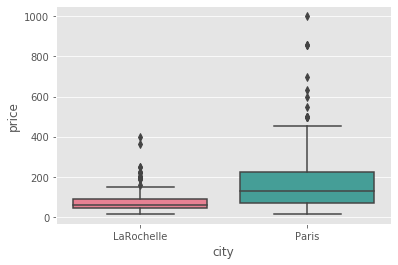

In [47]:
# price analysis by city
sns.boxplot(x = 'city', y= 'price', data=airdf, palette="husl")

                  mean   max  min
city                             
LaRochelle   71.972549   400   15
Paris       182.004255  1000   16


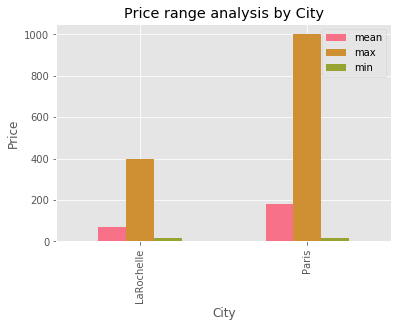

In [48]:
with sns.color_palette("husl", 8): 

    airCityPrice = airdf.groupby('city').agg(['mean','max','min']).price
    
    print(airCityPrice)

    airCityPrice.plot(kind='bar')
    plt.xlabel('City')
    plt.ylabel('Price')
    plt.title('Price range analysis by City')

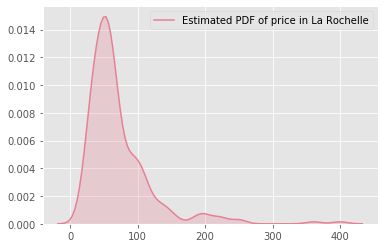

In [49]:
sns.kdeplot(airdf[airdf.city == 'LaRochelle'].price, shade=True, color = "#E68193", label='Estimated PDF of price in La Rochelle')  


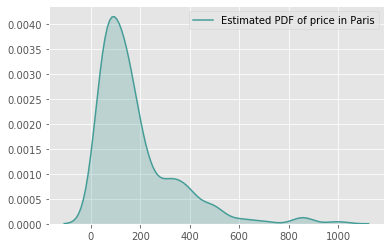

In [50]:
sns.kdeplot(airdf[airdf.city == 'Paris'].price, shade=True, color = "#459D97", label='Estimated PDF of price in Paris')

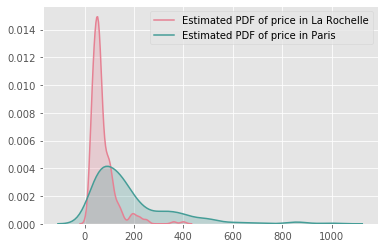

In [51]:
sns.kdeplot(airdf[airdf.city == 'LaRochelle'].price, shade=True, color = "#E68193", label='Estimated PDF of price in La Rochelle')  
sns.kdeplot(airdf[airdf.city == 'Paris'].price, shade=True, color = "#459D97", label='Estimated PDF of price in Paris')

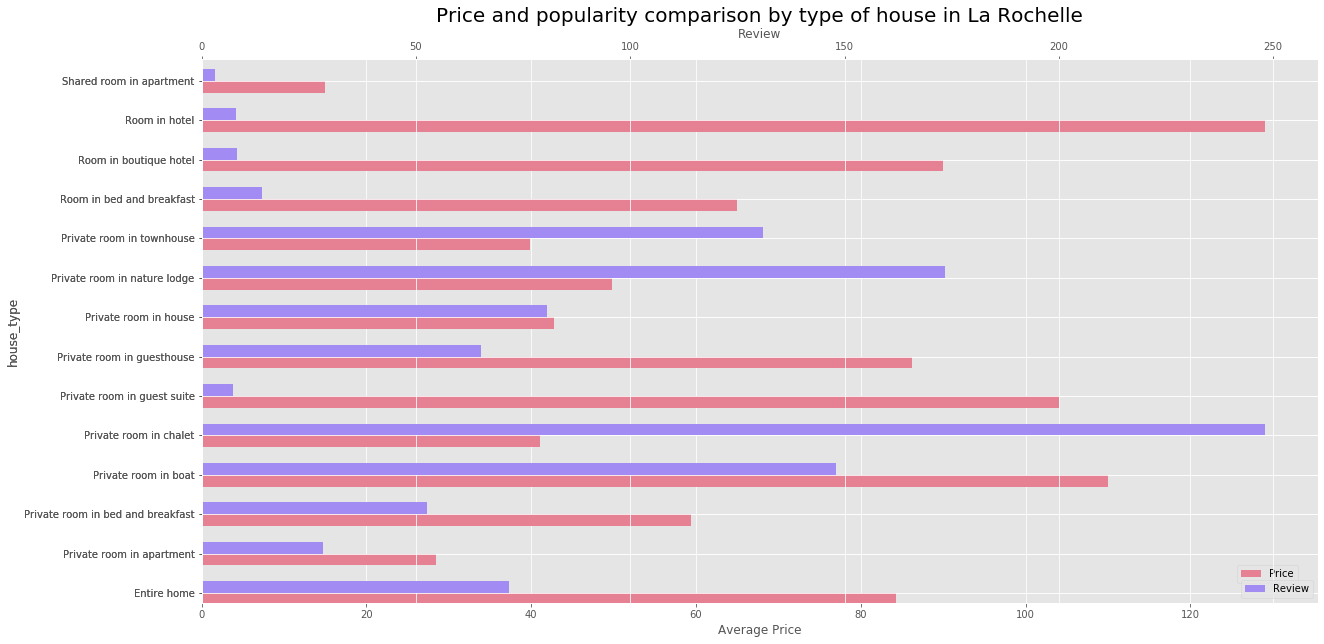

In [54]:
# Plot Price and popularity comparison by type of House in Manhattan
priceLaR = airdf[airdf.city == 'LaRochelle'].groupby('house_type')['price'].mean()
reviewLaR = airdf[airdf.city == 'LaRochelle'].groupby('house_type')['no_of_ratings'].mean()

#print(priceLaR)
#print(reviewLaR)

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = priceLaR.plot(kind='barh', color = "#E68193", ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = reviewLaR.plot(kind='barh', color = "#A28CF4", ax=ax2, width=width, position=0,legend = True,label = 'Review')


ax.set_xlabel('Average Price')
ax2.set_xlabel('Review')
#plt.ylabel('House Type')
plt.title('Price and popularity comparison by type of house in La Rochelle', fontsize=20)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

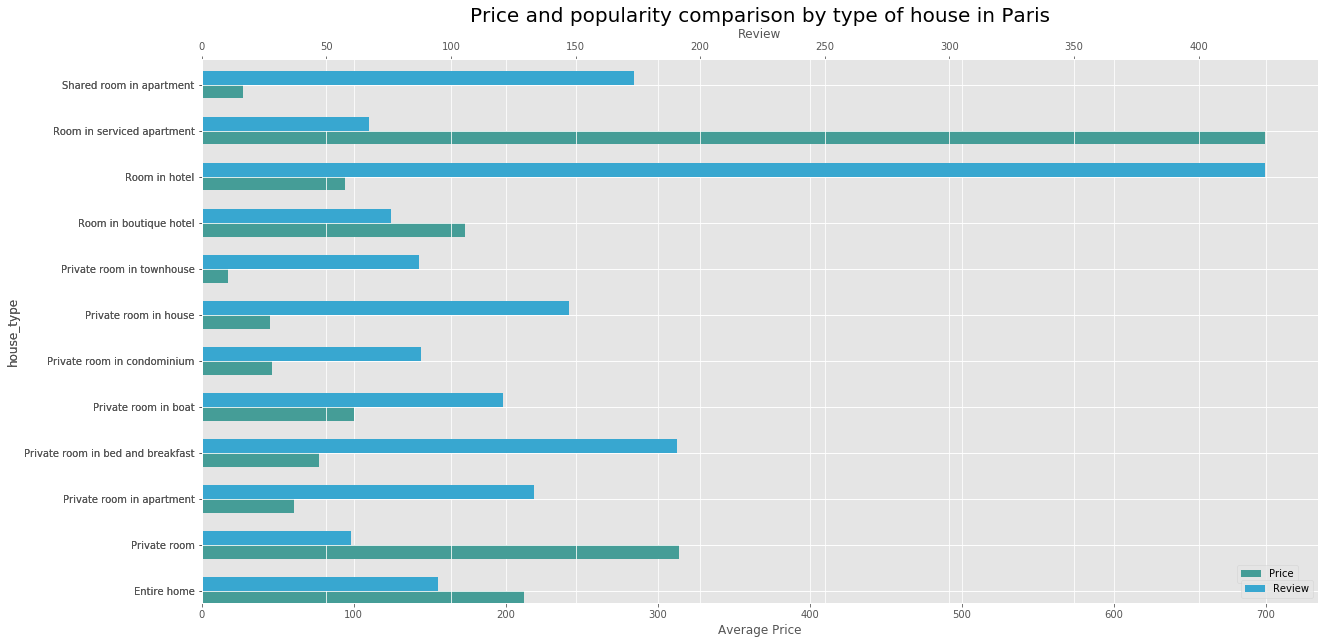

In [57]:
# Plot Price and popularity comparison by type of House in Manhattan
priceParis = airdf[airdf.city == 'Paris'].groupby('house_type')['price'].mean()
reviewParis = airdf[airdf.city == 'Paris'].groupby('house_type')['no_of_ratings'].mean()

#print(priceParis)
#print(reviewParis)

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = priceParis.plot(kind='barh', color = "#459D97", ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = reviewParis.plot(kind='barh', color = "#38A7D0", ax=ax2, width=width, position=0,legend = True,label = 'Review')


ax.set_xlabel('Average Price')
ax2.set_xlabel('Review')
#plt.ylabel('House Type')
plt.title('Price and popularity comparison by type of house in Paris', fontsize=20)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

Text(0.5, 1.0, 'La Rochelle: How many guest can this location accomodate? ')

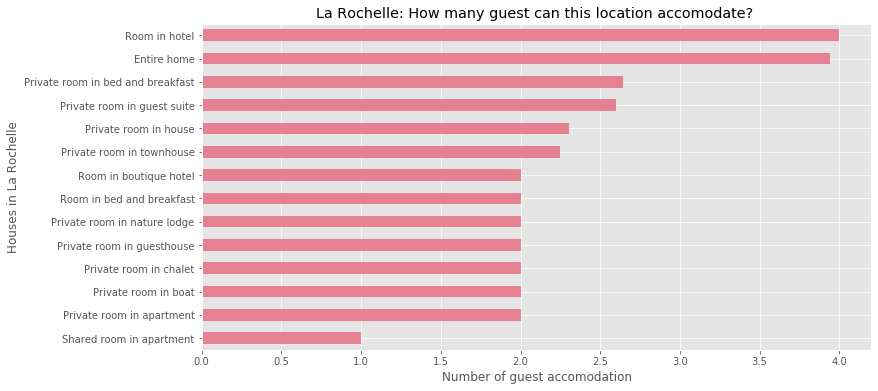

In [27]:
# type analysis in La Rochelle by house size

plt.figure(figsize=(12,6))
airdf[airdf.city == 'LaRochelle'].groupby('house_type')['no_of_guest'].mean().sort_values().plot(kind='barh', color='#E68193')
plt.xlabel('Number of guest accomodation')
plt.ylabel('Houses in La Rochelle')
plt.title('La Rochelle: How many guest can this location accomodate? ')

Text(0.5, 1.0, 'Paris: How many guest can this location accomodate?')

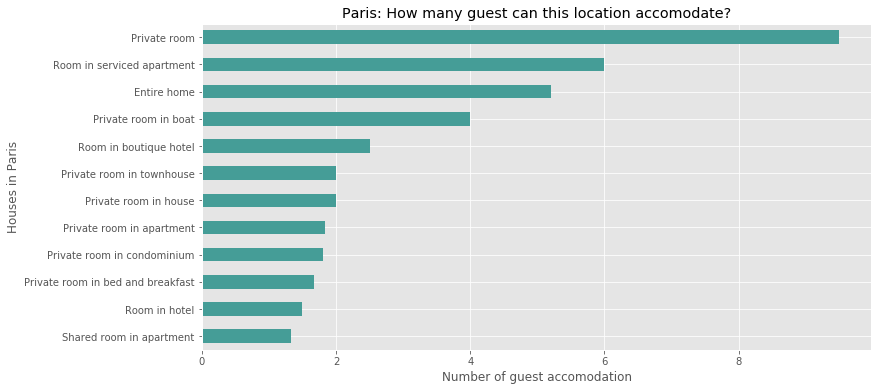

In [28]:
# type analysis in Paris by house size

plt.figure(figsize=(12,6))
airdf[airdf.city == 'Paris'].groupby('house_type')['no_of_guest'].mean().sort_values().plot(kind='barh', color = '#459D97')
plt.xlabel('Number of guest accomodation')
plt.ylabel('Houses in Paris')
plt.title('Paris: How many guest can this location accomodate?')

Text(0.5, 1.0, 'Average price in La Rochelle by house type')

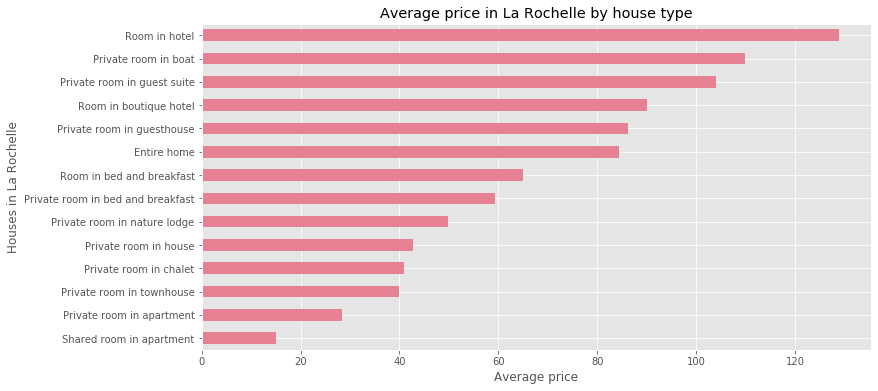

In [29]:
# price analysis in La Rochelle by house type

plt.figure(figsize=(12,6))
airdf[airdf.city == 'LaRochelle'].groupby('house_type')['price'].mean().sort_values().plot(kind='barh', color='#E68193')
plt.xlabel('Average price')
plt.ylabel('Houses in La Rochelle')
plt.title('Average price in La Rochelle by house type')


Text(0.5, 1.0, 'Average price in Paris by house type')

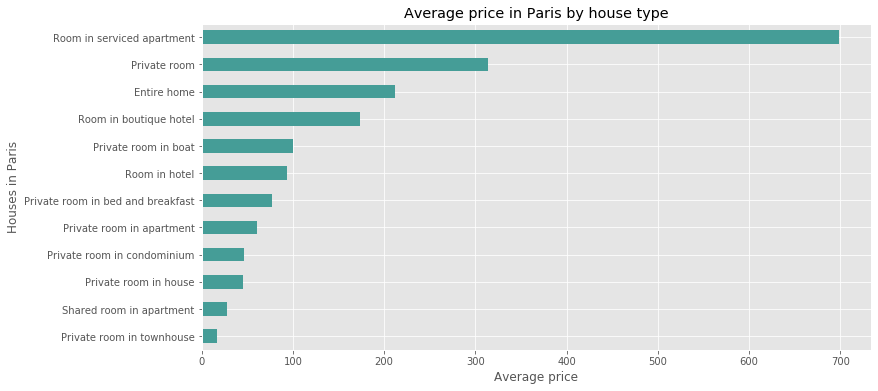

In [30]:
# price analysis in Paris by house type

plt.figure(figsize=(12,6))
airdf[airdf.city == 'Paris'].groupby('house_type')['price'].mean().sort_values().plot(kind='barh', color = '#459D97')
plt.xlabel('Average price')
plt.ylabel('Houses in Paris')
plt.title('Average price in Paris by house type')


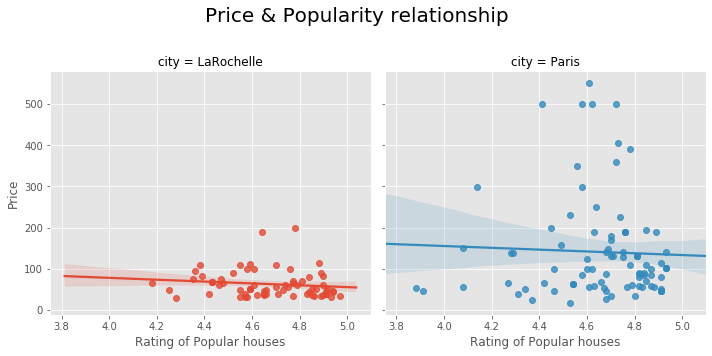

In [31]:
lmplt = sns.lmplot(x = 'rating', y= 'price', data=airdf[airdf.no_of_ratings > np.mean(airdf.no_of_ratings)], hue="city", 
           col = 'city')
lmplt = lmplt.set_axis_labels("Rating of Popular houses", "Price")
fig = lmplt.fig
fig.suptitle("Price & Popularity relationship", fontsize=20)
lmplt.fig.subplots_adjust(top=.8)

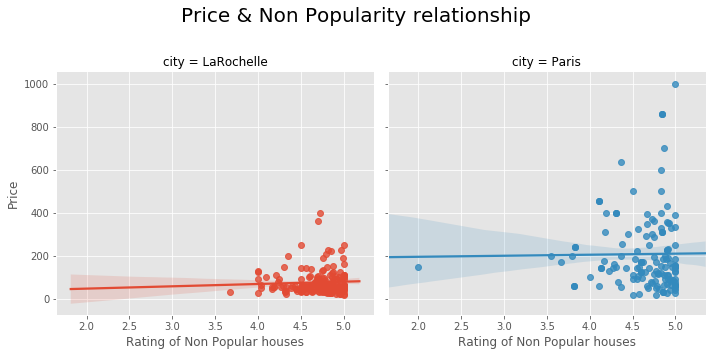

In [32]:
lmplt = sns.lmplot(x = 'rating', y= 'price', data=airdf[airdf.no_of_ratings <= np.mean(airdf.no_of_ratings)], hue="city",
          fit_reg = True, col = 'city')
lmplt = lmplt.set_axis_labels("Rating of Non Popular houses", "Price")
fig = lmplt.fig
fig.suptitle("Price & Non Popularity relationship", fontsize=20)
lmplt.fig.subplots_adjust(top=.8)

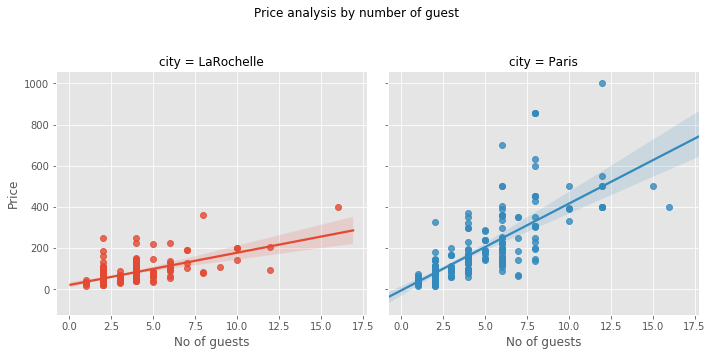

In [33]:
# price analysis by number of guest the house can accomodate for both cities

guestPrice = sns.lmplot(x = 'no_of_guest', y= 'price', data=airdf, hue="city", col = 'city',  )

plt.subplots_adjust(top=0.8)
guestPrice.fig.suptitle('Price analysis by number of guest')
guestPrice.set_axis_labels('No of guests', 'Price')


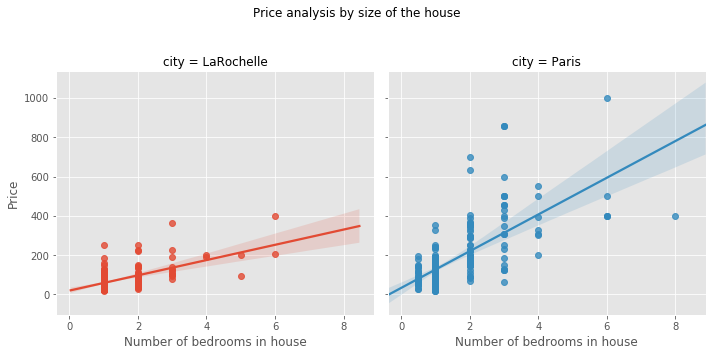

In [34]:
# price analysis by size of the house for both cities

houseSizePrice = sns.lmplot(x = 'house', y= 'price', data=airdf, hue="city", col = 'city')
plt.subplots_adjust(top=0.8)
houseSizePrice.fig.suptitle('Price analysis by size of the house')
houseSizePrice.set_axis_labels('Number of bedrooms in house', 'Price')

In [35]:
airdf[airdf.city=='LaRochelle'].corr()

,price,no_of_ratings,rating,no_of_guest,house,beds,bath
price,1.000000,-0.133275,0.031429,0.617995,0.610560,0.546581,0.313717
no_of_ratings,-0.133275,1.000000,-0.076365,-0.030498,-0.055283,-0.035154,-0.052860
rating,0.031429,-0.076365,1.000000,-0.057941,-0.038060,-0.070089,0.004887
no_of_guest,0.617995,-0.030498,-0.057941,1.000000,0.865595,0.868365,0.373732
house,0.610560,-0.055283,-0.038060,0.865595,1.000000,0.804894,0.427587
beds,0.546581,-0.035154,-0.070089,0.868365,0.804894,1.000000,0.373108
bath,0.313717,-0.052860,0.004887,0.373732,0.427587,0.373108,1.000000


(7.0, 0.0)

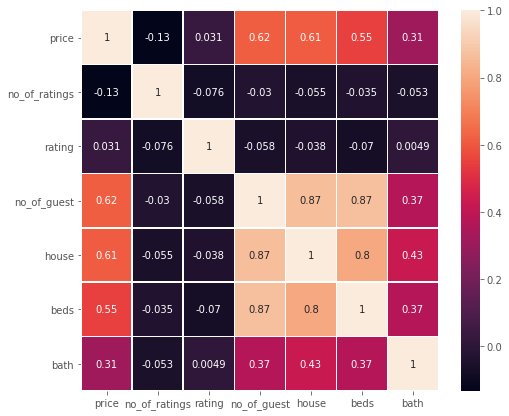

In [41]:
#Correlation Matrix visualization

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,7)) 
corrMatrix = airdf[airdf.city=='LaRochelle'].corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [36]:
airdf[airdf.city=='Paris'].corr()

,price,no_of_ratings,rating,no_of_guest,house,beds,bath
price,1.000000,-0.190474,-0.005004,0.736961,0.672932,0.687366,0.577600
no_of_ratings,-0.190474,1.000000,0.017256,-0.212275,-0.193469,-0.187824,-0.173028
rating,-0.005004,0.017256,1.000000,-0.106923,-0.041230,-0.102444,-0.098505
no_of_guest,0.736961,-0.212275,-0.106923,1.000000,0.863693,0.915672,0.603592
house,0.672932,-0.193469,-0.041230,0.863693,1.000000,0.831461,0.709804
beds,0.687366,-0.187824,-0.102444,0.915672,0.831461,1.000000,0.630622
bath,0.577600,-0.173028,-0.098505,0.603592,0.709804,0.630622,1.000000


(7.0, 0.0)

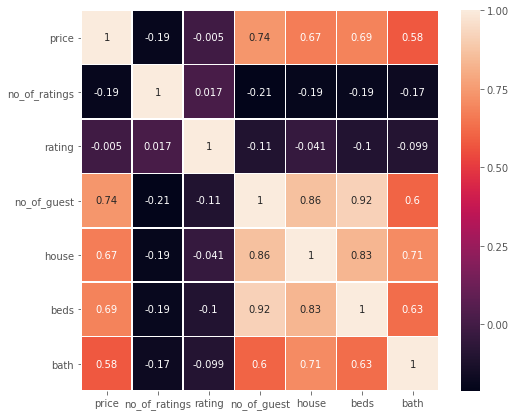

In [42]:
#Correlation Matrix visualization

fig, ax = plt.subplots(figsize=(8,7)) 
corrMatrix = airdf[airdf.city=='Paris'].corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

/home/laclac/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


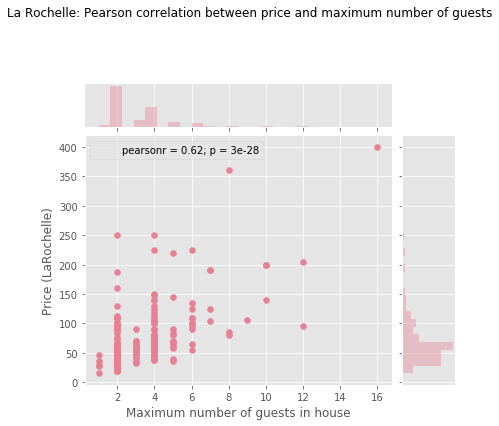

In [37]:
jplotLaR_guest = sns.jointplot(airdf[airdf.city=='LaRochelle'].no_of_guest, airdf[airdf.city=='LaRochelle'].price, color = '#E68193')
jplotLaR_guest.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
jplotLaR_guest.fig.suptitle('La Rochelle: Pearson correlation between price and maximum number of guests')
jplotLaR_guest.set_axis_labels('Maximum number of guests in house', 'Price (LaRochelle)')
plt.show()

# we see "pearsonr=0.62" which indicates the pearson correlation of these two variables.
#we also see the p value is pretty small, 
#which indicates that there is a significant linear relation between the two variables

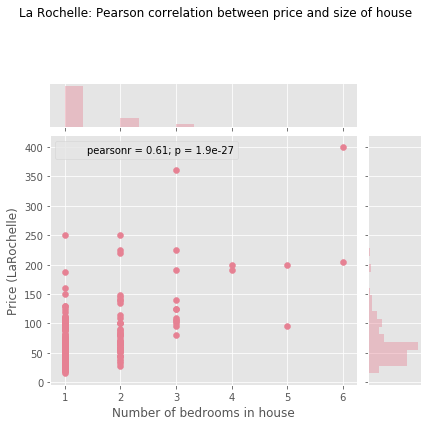

In [38]:
jplotLaR_bedroom = sns.jointplot(airdf[airdf.city=='LaRochelle'].house, airdf[airdf.city=='LaRochelle'].price, color = '#E68193')
jplotLaR_bedroom.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
jplotLaR_bedroom.fig.suptitle('La Rochelle: Pearson correlation between price and size of house')
jplotLaR_bedroom.set_axis_labels('Number of bedrooms in house', 'Price (LaRochelle)')
plt.show()

# we see "pearsonr=0.61" which indicates the pearson correlation of these two variables.
#we also see the p value is pretty small, 
#which indicates that there is a significant linear relation between the two variables

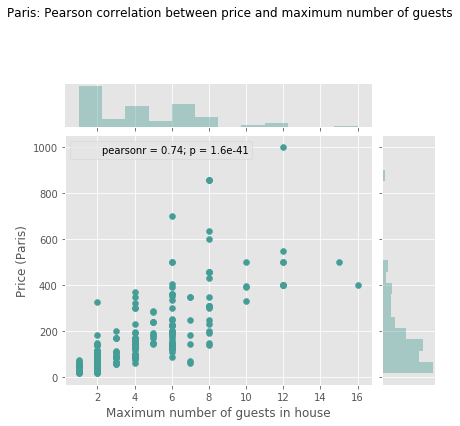

In [39]:
jplotParis_guest = sns.jointplot(airdf[airdf.city=='Paris'].no_of_guest, airdf[airdf.city=='Paris'].price, color = '#459D97')
jplotParis_guest.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
jplotParis_guest.fig.suptitle('Paris: Pearson correlation between price and maximum number of guests')
jplotParis_guest.set_axis_labels('Maximum number of guests in house', 'Price (Paris)')
plt.show()

# we see "pearsonr=0.74" which indicates the pearson correlation of these two variables.
#we also see the p value is pretty small, 
#which indicates that there is a significant linear relation between the two variables

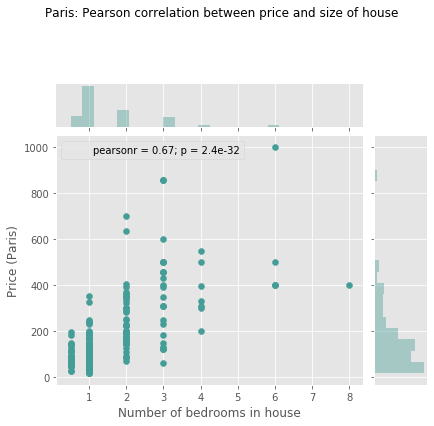

In [40]:
jplotParis_bedroom = sns.jointplot(airdf[airdf.city=='Paris'].house, airdf[airdf.city=='Paris'].price, color = '#459D97')
jplotParis_bedroom.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
jplotParis_bedroom.fig.suptitle('Paris: Pearson correlation between price and size of house')
jplotParis_bedroom.set_axis_labels('Number of bedrooms in house', 'Price (Paris)')
plt.show()

# we see "pearsonr=0.67" which indicates the pearson correlation of these two variables.
#we also see the p value is pretty small, 
#which indicates that there is a significant linear relation between the two variables